Contents under Creative Commons BY 4.0 license and code under MIT license. © Julian Parra 2019. This material is part of the Master of Engineering program by Julian Parra at Universidad EAFIT.

# One-dimensional non-linear spring elements.

Simple spring elements are commonly used for the assemblage of complex structural systems like in the modelling of drilled shafts, plastic hinges in framed structures and base isolated buildings. This example describes the non-linear static analysis of a simple assemblage of spring elements. A pseudo-static load of total magnitude $100 kgf$ is applied to the center node.

<span style="color:red"> El modelo constitutivo que describe el comportamiento no lineal de los resortes, es el mismo planteado en Simo & Hughes, 2006. Algoritmo "BOX 1.4. Return-Mapping Algorithm for 1-D, Rate-Independent Plasticity. Isotropic Hardening.", y corresponde a una curva bilineal con endurecimiento isotropico, y que permite describir ciclos de de carga y descarga (Ver referencias). </span>

<span style="color:red"> A continuación, se muestra un esquema que representa el modelo constitutivo empleado:</span>

<img src="img/Example3_Constitutive.PNG" alt="files" style="width:450px" align="center"/>

<span style="color:red">La rigidez de los resortes, está representada en función del área trasnversal, el modulo de elasticidad del material y la longitud de los mismos. La matriz de rigidez local de estos elementos, que aporta únicamente a la rigidez traslacional del sistem, está descrita por:</span>

\begin{array}{l}K_{loc}= \begin{bmatrix}
\frac{AE}{L} & \frac{-AE}{L} \\ 
\frac{-AE}{L} & \frac{AE}{L}
\end{bmatrix}\end{array}

<br>

**Input and output files for this problem are available in the examples folder of this REPO (notebooks\Examples).**   


The following 1D spring assembly was analyzed. Static nodal force was applied at nodes 1 as it is shown at the figure. For this example it was used **[kgf-m]** as consistent units for the analysis. 

<img src="img/Example3_Model.PNG" alt="files" style="width:400px" align="center"/>

> - Element type: `5`
> - Cross sectioal area, **$A$**: *0.25 m²*
> - Young modulus, **$E$**: *100000 kgf/m²*
> - Yield stress, **$\sigma_{y}$**: *150 kgf/m²*
> - Strain hardening parameter, $K$: *10000 kgf/m²*

In [1]:
%matplotlib inline        
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from os import sys
sys.path.append("../source/")
from STRUCTURE import Struct_DYN
from postprocesor import *

# Execute analysis
displacement,folder,IBC,nodes,elements,ninc,T,MvarsGen,ILFGen = Struct_DYN("Examples/Ex_04/01_INPUT/")

----------------------
Number of nodes: 3
Number of elements: 2
Number of equations: 1
Number of equations after constraints: 1
----------------------
Natural periods of the system :  Not computed,static system solution
----------------------
Time step for solution: 0.1 sec
Number of time increments: 50
----------------------
Convergency reached after  1  iterations at increment  36  ( 3.6 sec)
Duration for system solution: 0:00:00.037900
Duration for the system's solution: 0:00:00.037900
Duration for post processing: 0:00:00
----------------------
Analysis terminated successfully!
----------------------


## Results

The following figure shows the displacement time history for the loaded node.

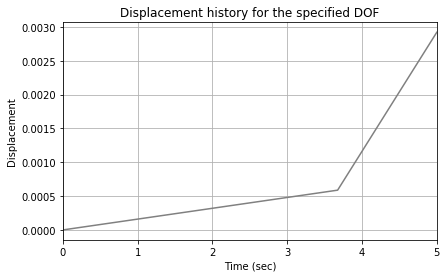

In [2]:
fig = NodalDispPLT(displacement[0,:], T, ninc, ylabel = "Displacement")

The observed slope change occurs at the time increment where the inelastic behavior takes place (3.6 s). The particular bi-lineal shape of the dispalcement response is controlled by the bi-lineal constitutive behavior of the nonlinear sprinmgs. The associated stress-strain curve for element ``0`` is shown next.

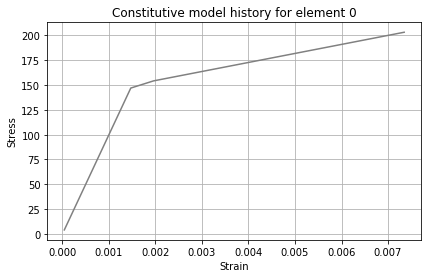

In [3]:
histe = PlasModel(MvarsGen, Element = 0, xlabel = "Strain", ylabel = "Stress")

It is observed that inelastic response appears when the stress in the spring reaches the prescribed value of 150 kgf/m².

### References

Simo, Juan C., and Thomas JR Hughes. Computational inelasticity. Vol. 7. Springer Science & Business Media, 2006


In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()